# Ejemplos

## `incremental_fun`

Intente escribirla con lapply pero no me funca
```
test_f <- function(df, sample, va, order) {
    df <- df[ , c(sample, order, va)]
    sdf <- split(df, df[, sample])
    sdf <- lapply(sdf, function(x) transform(x,  Delta = c(NA, diff(va))))
    #sdf <- do.call("rbind", sdf)
    # colnames(sdf)[length(colnames(sdf))] <- paste0("Delta", va)
    return(sdf)
}
```

Como dice la ayuda, la funcion devuelve el data frame original con una nueva variable `x`
Delta`+nombre_variable` que contiene los incrementos a lo largo de la dimensión `order`
para cada caso en `sample`.  
En el ejemplo que sigue se calculan los incrementos corrientes del diámetro de pinus y posteriormente 
los incrementos medios.

In [4]:
source("R/incremental_fun.R")

In [6]:
load("Data/df_pinus.RData")
head(df_pinus, 3)

ID_Arbol Edad      Dn    
1 68        5.000000 11.600
2 68        8.083333 18.200
3 68       10.000000 21.486

* **Incremento del Diámetro**

In [7]:
df_pinus <- incremental_fun(df_pinus, va = "Dn", sample = "ID_Arbol", order = "Edad")

In [8]:
head(df_pinus, 3)

ID_Arbol Edad      Dn     DeltaDn
1 68        5.000000 11.600    NA  
2 68        8.083333 18.200 6.600  
3 68       10.000000 21.486 3.286

* **Incremento en Edad**

In [5]:
df_pinus <- incremental_fun(df_pinus, x = "Edad", sample = "ID_Arbol", order = "Edad")

In [6]:
head(df_pinus, 3)

ID_Arbol Edad      Dn     DeltaDn DeltaEdad
1 68        5.000000 11.600    NA         NA 
2 68        8.083333 18.200 6.600   3.083333 
3 68       10.000000 21.486 3.286   1.916667

#### Imputaciones (no necesarias)

In [9]:
df_pinus[is.na(df_pinus$DeltaDn), "DeltaDn"] <-  df_pinus[is.na(df_pinus$DeltaDn), "Dn"]

In [12]:
df_pinus[is.na(df_pinus$DeltaEdad), "DeltaEdad"] <-  df_pinus[is.na(df_pinus$DeltaEdad), "Edad"]

In [15]:
df_pinus$ImaDn <- with(df_pinus, DeltaDn/DeltaEdad)

In [16]:
head(df_pinus, 3)

ID_Arbol Edad      Dn     DeltaDn DeltaEdad ImaDn   
1 68        5.000000 11.600 11.600  5.000000  2.320000
2 68        8.083333 18.200  6.600  3.083333  2.140541
3 68       10.000000 21.486  3.286  1.916667  1.714435

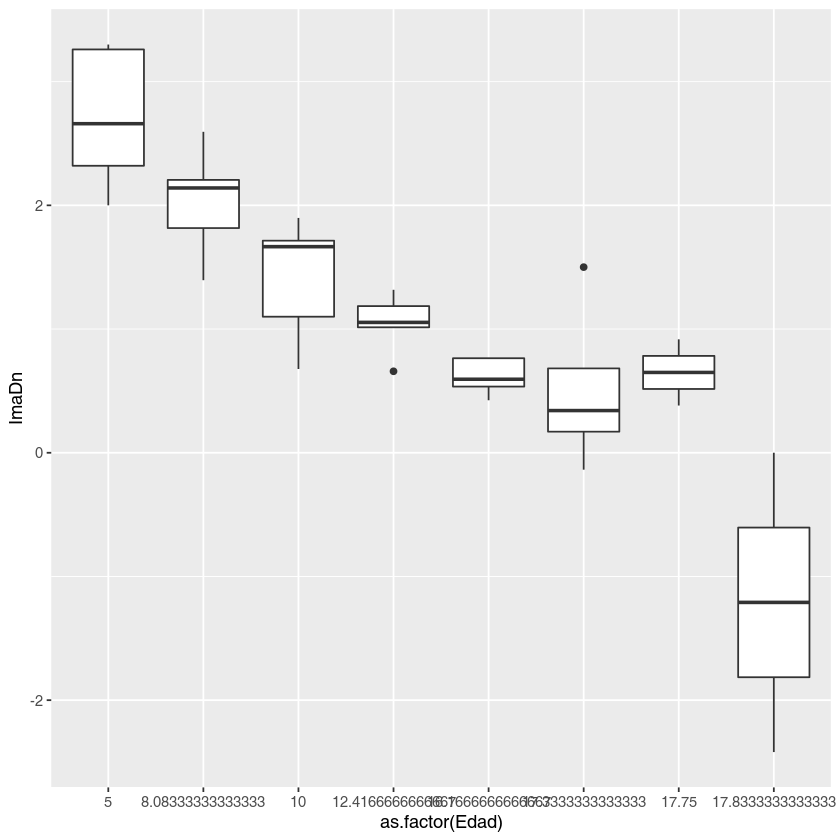

In [29]:
ggplot(df_pinus, aes(as.factor(Edad), ImaDn)) +
    geom_boxplot()

In [ ]:
(